# <p><center style="font-family:newtimeroman;font-size:180%;"> Brain Tumors Variety Classification and Quality Evaluation Using Image Analysis </center></p>
### Table of contents:

* [Import Libraries](#1)
* [Read Data](#2)
* [Visualization Of Dataset](#3)
* [VGG16 Model](#4)
* [ResNet101 Model](#5)
* [MobileNet Model](#7)
* [Predictions](#8)
* [Evaluate The Model](#9)

**<a id="1"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Import Libraries </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [1]:
import os
import cv2
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**<a id="2"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Read Data </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [2]:
def DataFrame(path):
    images = []
    labels = []
    for subfolder in os.listdir(path):
        subfolder_path = os.path.join(path, subfolder)
        if not os.path.isdir(subfolder_path):
            continue
        for image_filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, image_filename)
            images.append(image_path)
            labels.append(subfolder)
    df = pd.DataFrame({'image': images, 'label': labels})
    return df
train_df=DataFrame('/kaggle/input/brain-tumor-mri-dataset/Training')
train_df

,image,label
0,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Training...,pituitary
...,...,...
5707,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5708,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5709,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma
5710,/kaggle/input/brain-tumor-mri-dataset/Training...,glioma


In [3]:
test_df=DataFrame('/kaggle/input/brain-tumor-mri-dataset/Testing')
test_df

,image,label
0,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
1,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
2,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
3,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
4,/kaggle/input/brain-tumor-mri-dataset/Testing/...,pituitary
...,...,...
1306,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1307,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1308,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma
1309,/kaggle/input/brain-tumor-mri-dataset/Testing/...,glioma


In [4]:
batch_size = 32
target_size = (224, 224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    validation_split=validation_split,
    subset="training",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Training',
    validation_split=validation_split,
    subset="validation",
    seed=44,
    image_size=target_size,
    batch_size=batch_size,
)
test= tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/brain-tumor-mri-dataset/Testing',
    seed=1000,
    image_size=target_size,
    batch_size=batch_size,
)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


**<a id="3"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Visualization of Dataset </p>
<a class="btn" href="#home">Tabel of Contents</a>

In [5]:
class_names = train.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

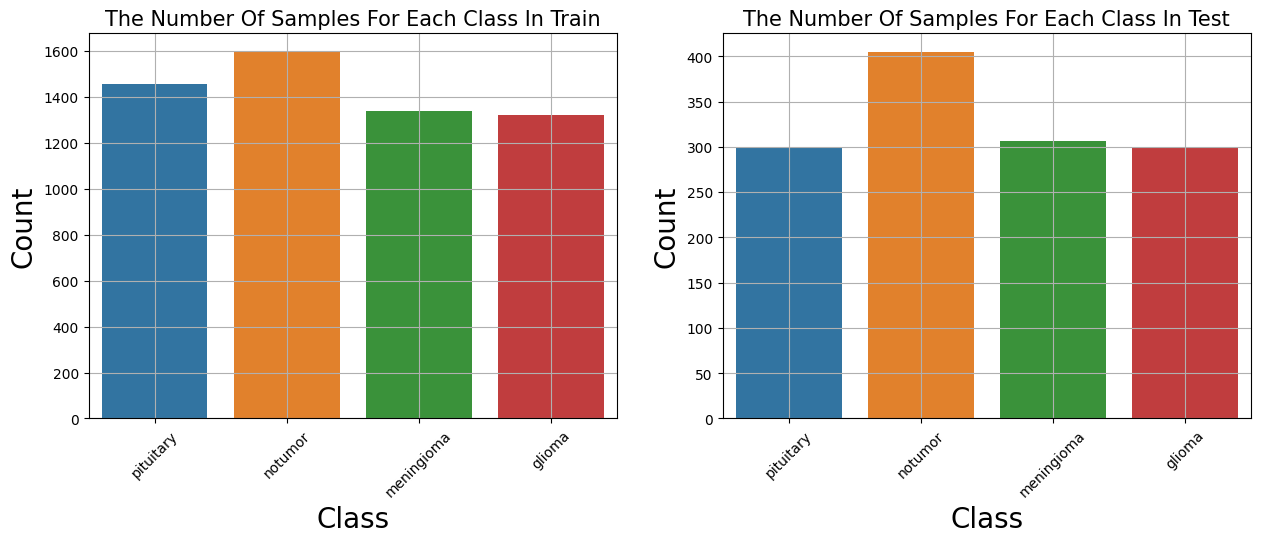

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=train_df.label)
plt.xlabel("Class",fontsize=20)
plt.title("The Number Of Samples For Each Class In Train",fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(x=test_df.label)
plt.xlabel("Class",fontsize=20)
plt.title("The Number Of Samples For Each Class In Test",fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

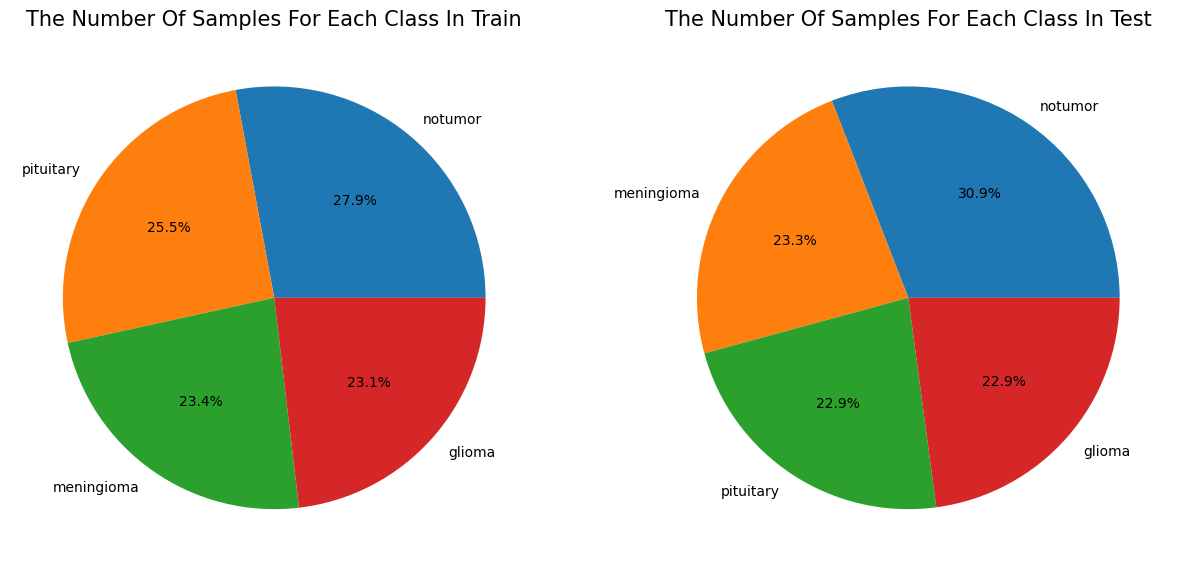

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.pie(train_df.label.value_counts(),labels=train_df.label.value_counts().index,autopct ='%1.1f%%')
plt.title("The Number Of Samples For Each Class In Train",fontsize=15)
plt.subplot(1,2,2)
plt.pie(test_df.label.value_counts(),labels=test_df.label.value_counts().index,autopct ='%1.1f%%')
plt.title("The Number Of Samples For Each Class In Test",fontsize=15)
plt.show()

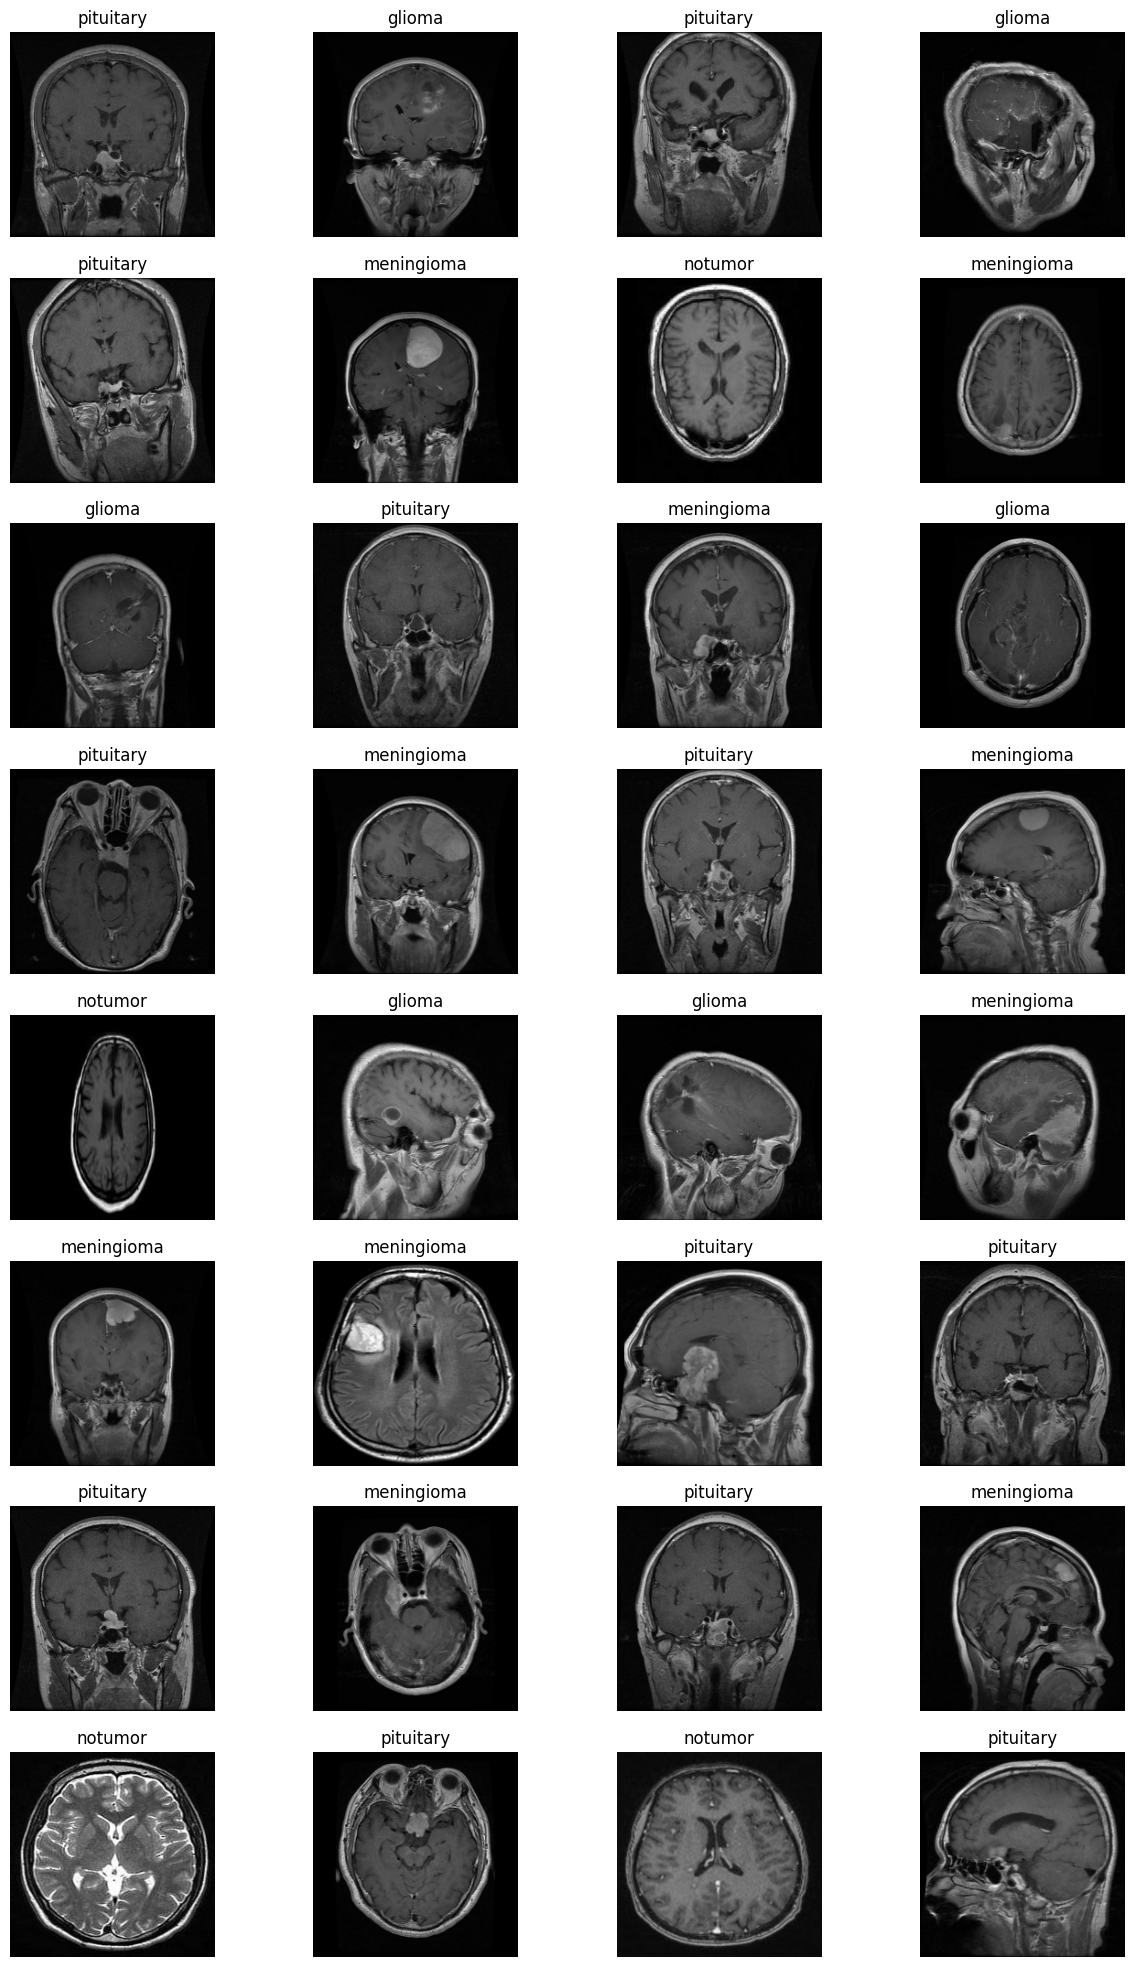

In [8]:
plt.figure(figsize=(15, 25))
for images, labels in train.take(1):
    for i in range(32):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<a id="4"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">VGG</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [9]:
base_model = tf.keras.applications.VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
vgg_model=keras.models.Sequential()
vgg_model.add(base_model)
vgg_model.add(keras.layers.Flatten()) 
vgg_model.add(keras.layers.Dropout(.5))
vgg_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
vgg_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dropout (Dropout)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 5)                 125445    
                                                                 
Total params: 14,840,133
Trainable params: 125,445
Non-trainable params: 14,714,688
_________________________________________________________________


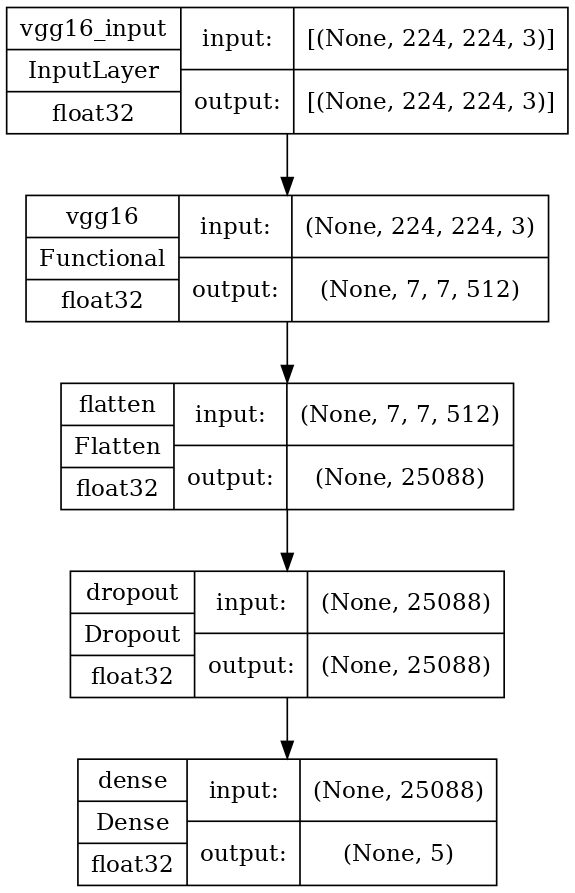

In [10]:
tf.keras.utils.plot_model(vgg_model, to_file='/kaggle/working/vgg_model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [11]:
checkpoint_cb =ModelCheckpoint("/kaggle/working/VGG_model.h5", save_best_only=True)
vgg_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=vgg_model.fit(train,epochs=20,validation_data=validation,callbacks=[checkpoint_cb])
score, acc =vgg_model.evaluate(test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

Epoch 1/20
143/143 [==============================] - 44s 201ms/step - loss: 4.1172 - accuracy: 0.8284 - val_loss: 2.1451 - val_accuracy: 0.9011
Epoch 2/20
143/143 [==============================] - 23s 156ms/step - loss: 1.8903 - accuracy: 0.9160 - val_loss: 0.9389 - val_accuracy: 0.9527
Epoch 3/20
143/143 [==============================] - 24s 163ms/step - loss: 1.7051 - accuracy: 0.9322 - val_loss: 0.9001 - val_accuracy: 0.9658
Epoch 4/20
143/143 [==============================] - 25s 175ms/step - loss: 1.1802 - accuracy: 0.9514 - val_loss: 2.1447 - val_accuracy: 0.9335
Epoch 5/20
143/143 [==============================] - 24s 166ms/step - loss: 0.8402 - accuracy: 0.9617 - val_loss: 1.1912 - val_accuracy: 0.9527
Epoch 6/20
143/143 [==============================] - 25s 173ms/step - loss: 0.9193 - accuracy: 0.9619 - val_loss: 1.0330 - val_accuracy: 0.9737
Epoch 7/20
143/143 [==============================] - 24s 167ms/step - loss: 0.9281 - accuracy: 0.9683 - val_loss: 0.5797 - val_ac

In [12]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,4.117235,0.828446,2.145135,0.901051
1,1.890289,0.915974,0.938940,0.952715
2,1.705067,0.932166,0.900071,0.965849
3,1.180175,0.951422,2.144708,0.933450
4,0.840189,0.961707,1.191219,0.952715
5,0.919338,0.961926,1.032970,0.973730
6,0.928136,0.968271,0.579720,0.983362
7,0.600348,0.971772,0.607698,0.985114
8,0.740499,0.972429,0.577733,0.983362
9,0.790246,0.973085,0.620020,0.985114


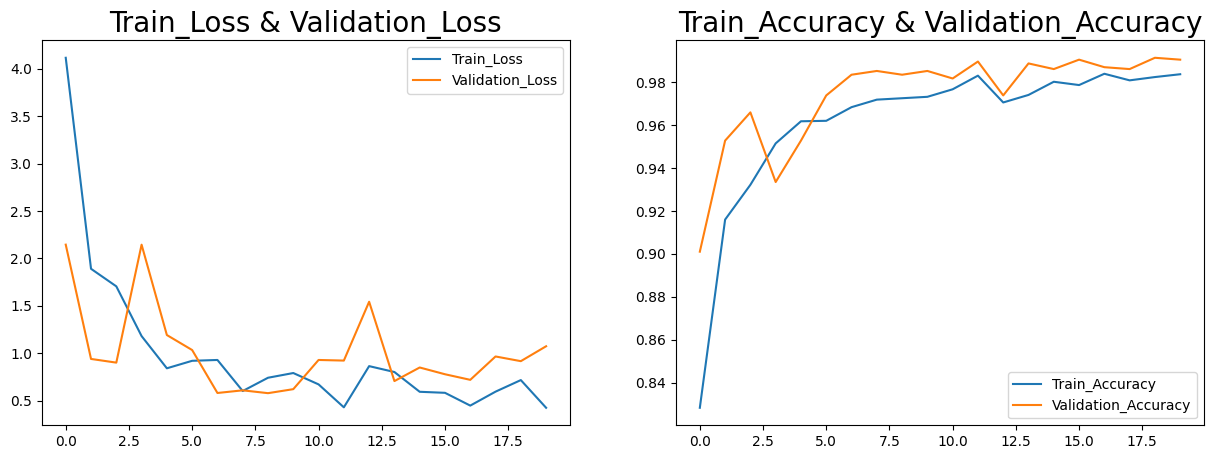

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

<a id="5"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">ResNet101</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [14]:
base_model = tf.keras.applications.ResNet101(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
resnet_model=keras.models.Sequential()
resnet_model.add(base_model)
resnet_model.add(keras.layers.Flatten()) 
resnet_model.add(keras.layers.Dropout(.5))
resnet_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
resnet_model.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 7, 7, 2048)        42658176  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dropout_1 (Dropout)         (None, 100352)            0         
                                                                 
 dense_1 (Dense)             (None, 5)                 501765    
                                                                 
Total params: 43,159,941
Trainable params: 501,765
Non-trainable params: 42,658,176
_________________________________________________________________


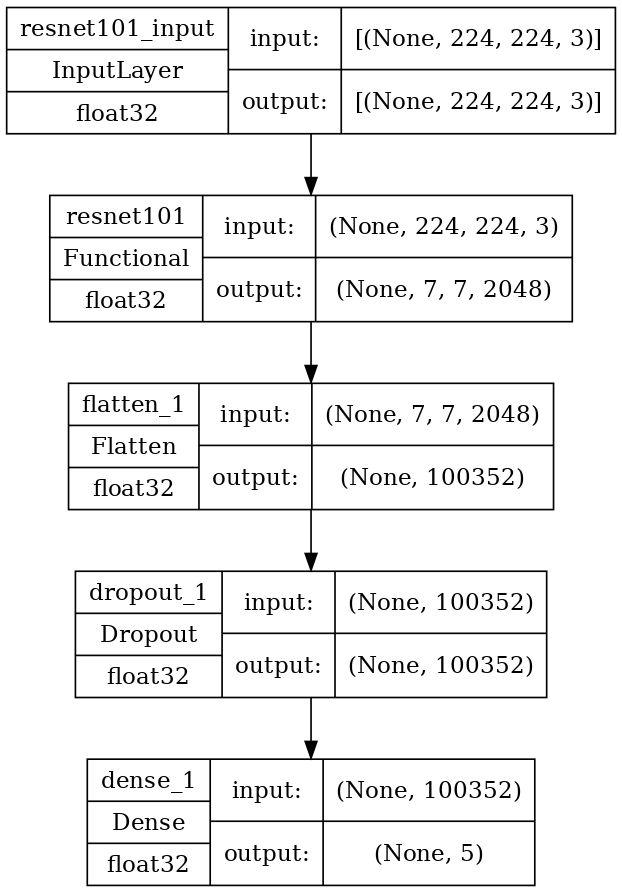

In [15]:
tf.keras.utils.plot_model(resnet_model, to_file='/kaggle/working/resnet_model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [16]:
checkpoint_cb =ModelCheckpoint("/kaggle/working/resnet_model.h5", save_best_only=True)
resnet_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=resnet_model.fit(train,epochs=20,validation_data=validation,callbacks=[checkpoint_cb])
score, acc = resnet_model.evaluate(test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

Epoch 1/20
143/143 [==============================] - 43s 244ms/step - loss: 2.8783 - accuracy: 0.8538 - val_loss: 0.7446 - val_accuracy: 0.9431
Epoch 2/20
143/143 [==============================] - 31s 214ms/step - loss: 0.7905 - accuracy: 0.9484 - val_loss: 0.5833 - val_accuracy: 0.9580
Epoch 3/20
143/143 [==============================] - 31s 213ms/step - loss: 0.6552 - accuracy: 0.9593 - val_loss: 0.4515 - val_accuracy: 0.9816
Epoch 4/20
143/143 [==============================] - 30s 208ms/step - loss: 0.5008 - accuracy: 0.9676 - val_loss: 0.4546 - val_accuracy: 0.9711
Epoch 5/20
143/143 [==============================] - 30s 208ms/step - loss: 0.4356 - accuracy: 0.9737 - val_loss: 0.5078 - val_accuracy: 0.9755
Epoch 6/20
143/143 [==============================] - 30s 207ms/step - loss: 0.3439 - accuracy: 0.9766 - val_loss: 0.5680 - val_accuracy: 0.9825
Epoch 7/20
143/143 [==============================] - 30s 207ms/step - loss: 0.2995 - accuracy: 0.9832 - val_loss: 0.6350 - val_ac

In [17]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,2.878298,0.853829,0.744628,0.943082
1,0.790454,0.948359,0.583319,0.957968
2,0.655234,0.959300,0.451544,0.981611
3,0.500750,0.967615,0.454614,0.971103
4,0.435556,0.973742,0.507800,0.975482
5,0.343890,0.976586,0.568022,0.982487
6,0.299516,0.983151,0.635004,0.977233
7,0.246753,0.987090,0.349540,0.985114
8,0.425516,0.980088,0.552798,0.983362
9,0.319078,0.984464,0.199828,0.993870


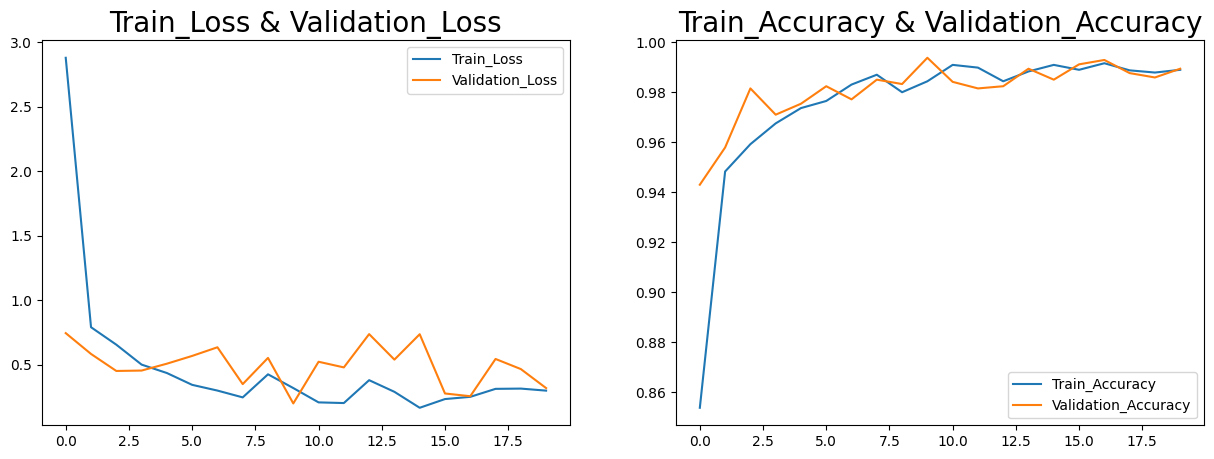

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

<a id="7"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">MobileNet</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [19]:
base_model = tf.keras.applications.MobileNet(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
mobile_model=keras.models.Sequential()
mobile_model.add(base_model)
mobile_model.add(keras.layers.Flatten()) 
mobile_model.add(keras.layers.Dropout(.5))
mobile_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
mobile_model.summary()

17225924/17225924 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dropout_2 (Dropout)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 5)                 250885    
                                                                 
Total params: 3,479,749
Trainable params: 250,885
Non-trainable params: 3,228,864
_________________________________________________________________


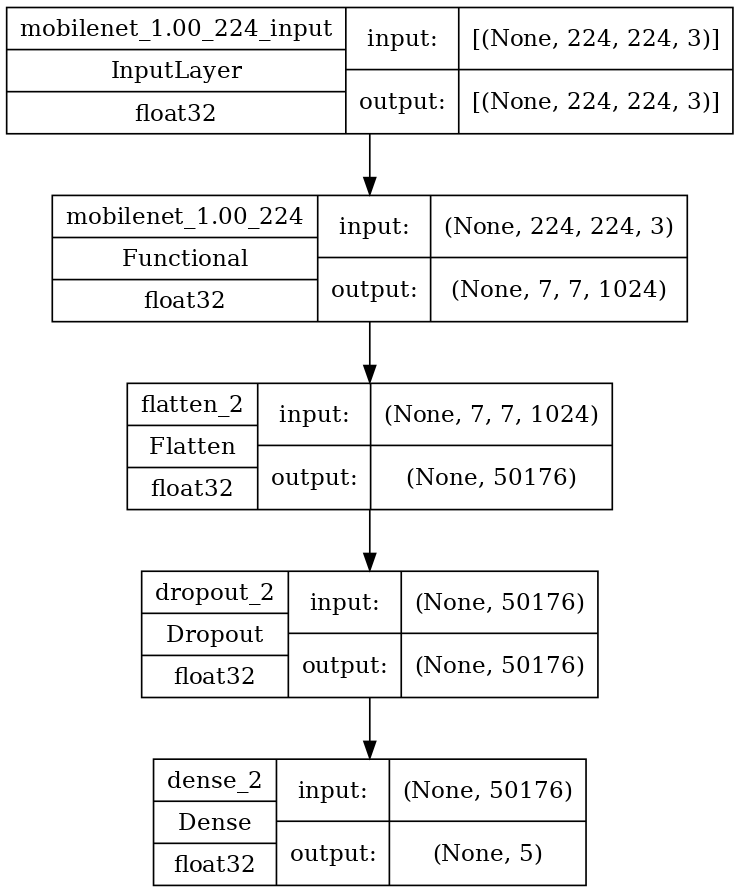

In [20]:
tf.keras.utils.plot_model(mobile_model, to_file='/kaggle/working/mobile_model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [21]:
checkpoint_cb =ModelCheckpoint("/kaggle/working/mobile_model.h5", save_best_only=True)
mobile_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=mobile_model.fit(train,epochs=20,validation_data=validation,callbacks=[checkpoint_cb])
score, acc =mobile_model.evaluate(test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

Epoch 1/20
143/143 [==============================] - 11s 56ms/step - loss: 1.6503 - accuracy: 0.8324 - val_loss: 0.9699 - val_accuracy: 0.8905
Epoch 2/20
143/143 [==============================] - 7s 48ms/step - loss: 0.6442 - accuracy: 0.9206 - val_loss: 0.1911 - val_accuracy: 0.9571
Epoch 3/20
143/143 [==============================] - 9s 57ms/step - loss: 0.3490 - accuracy: 0.9499 - val_loss: 0.3180 - val_accuracy: 0.9623
Epoch 4/20
143/143 [==============================] - 8s 51ms/step - loss: 0.2941 - accuracy: 0.9597 - val_loss: 0.2568 - val_accuracy: 0.9676
Epoch 5/20
143/143 [==============================] - 7s 48ms/step - loss: 0.3615 - accuracy: 0.9589 - val_loss: 0.4144 - val_accuracy: 0.9588
Epoch 6/20
143/143 [==============================] - 9s 60ms/step - loss: 0.2922 - accuracy: 0.9665 - val_loss: 0.3352 - val_accuracy: 0.9615
Epoch 7/20
143/143 [==============================] - 7s 48ms/step - loss: 0.1604 - accuracy: 0.9781 - val_loss: 0.4128 - val_accuracy: 0.966

In [22]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.650338,0.832385,0.969898,0.890543
1,0.644214,0.920569,0.191148,0.957093
2,0.349031,0.949891,0.317971,0.962347
3,0.294089,0.959737,0.256835,0.967601
4,0.361474,0.958862,0.414418,0.958844
5,0.292159,0.966521,0.335236,0.961471
6,0.160386,0.978118,0.412838,0.966725
7,0.323745,0.970678,0.268255,0.978984
8,0.365115,0.968928,0.189050,0.987741
9,0.288589,0.973523,0.400152,0.978109


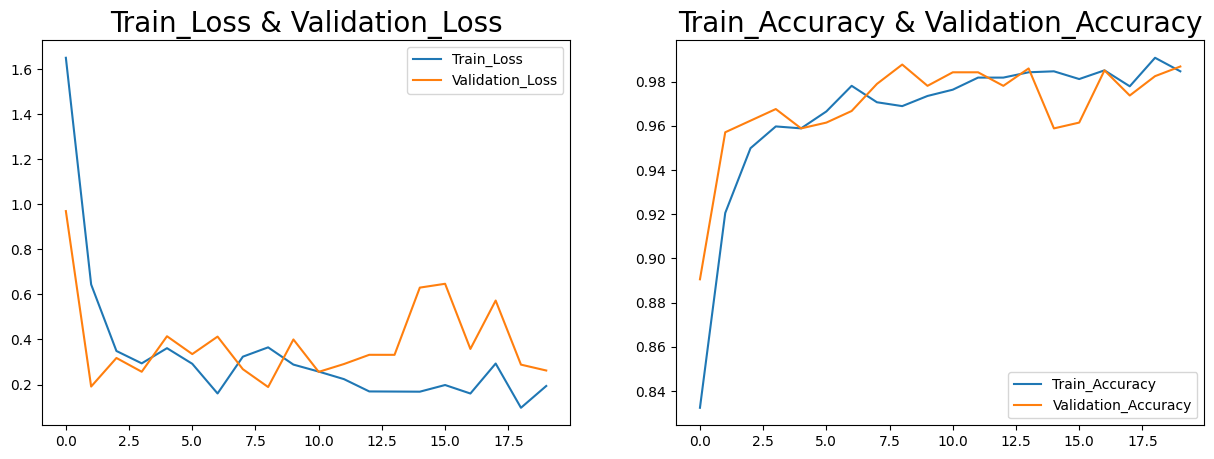

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

<a id="8"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px">Predictions</p>
<a class="btn" href="#home">Tabel of Contents</a>

In [24]:
X_test,y_test,y_pred=[],[],[]
for images, labels in test:
    y_test.extend(labels.numpy())
    X_test.extend(images.numpy())
predictions=vgg_model.predict(np.array(X_test))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_test,y_pred
df

41/41 [==============================] - 5s 126ms/step


,Actual,Prediction
0,1,1
1,2,2
2,0,0
3,1,1
4,2,2
...,...,...
1306,3,3
1307,3,3
1308,1,0
1309,0,0


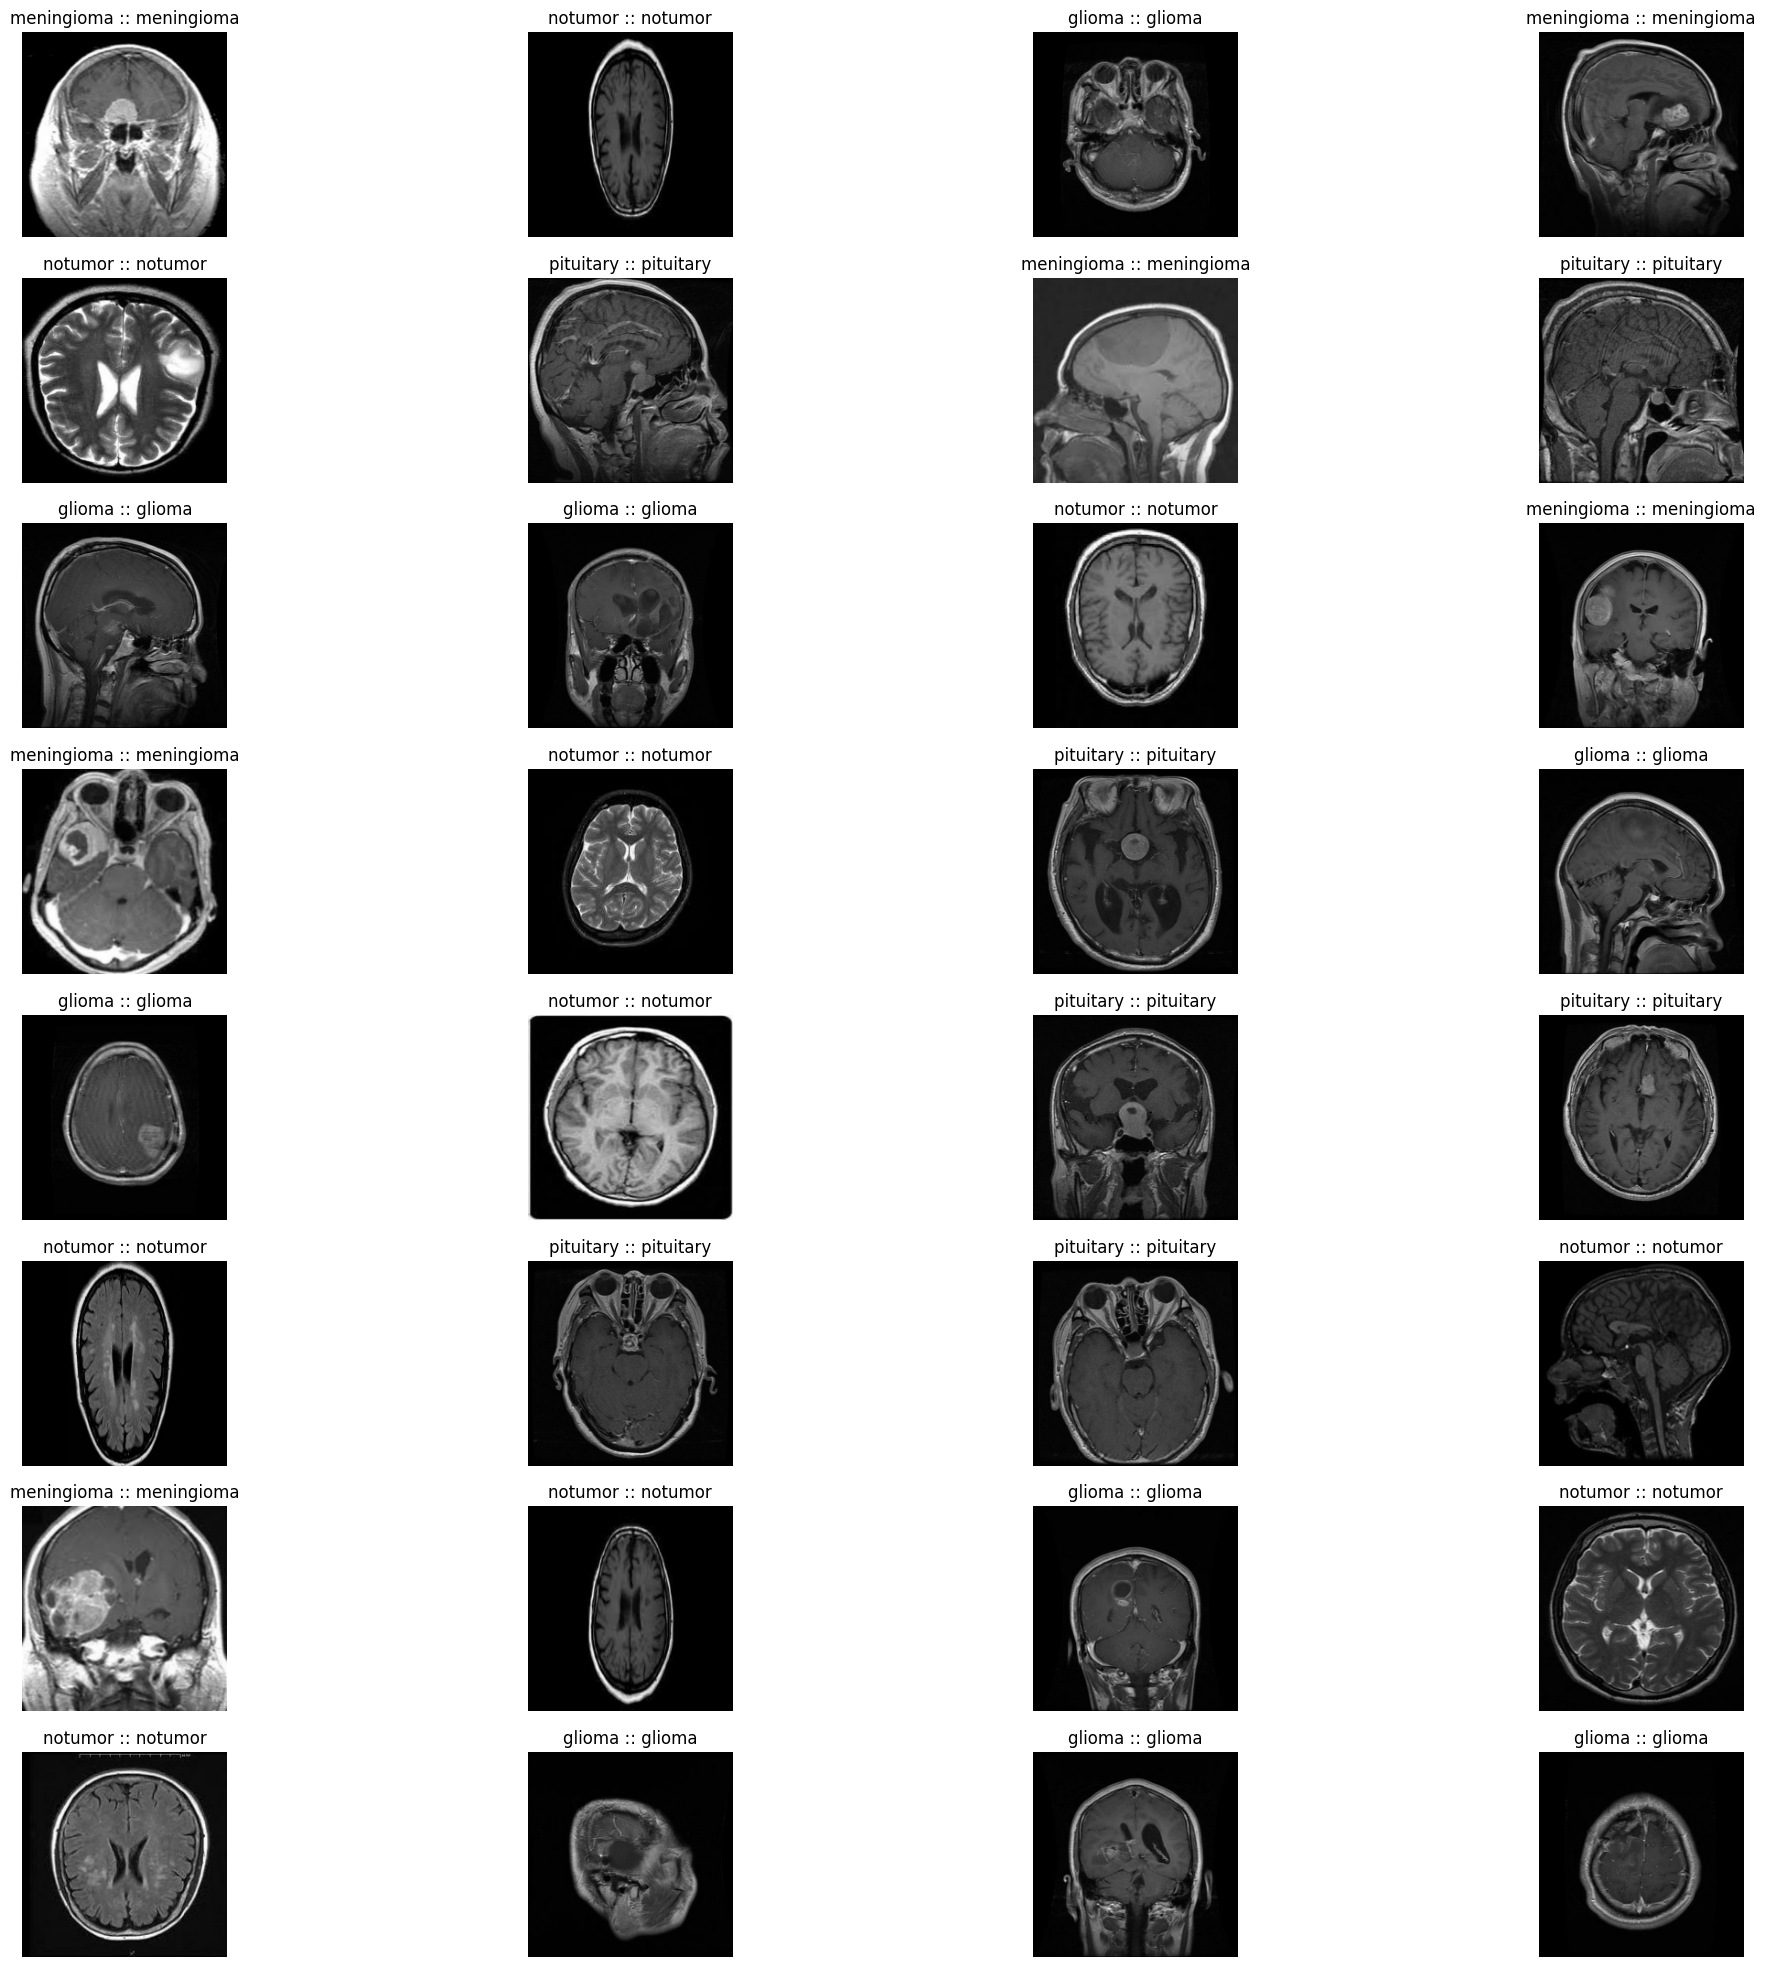

In [25]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_test[i].astype("uint8"))
    plt.title(f'{class_names[y_test[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

<a id="9"></a>
# <p style="background-image: url(https://i.postimg.cc/K87ByXmr/stage5.jpg);font-family:camtasia;font-size:120%;color:white;text-align:center;border-radius:15px 50px; padding:7px"> Evaluate The Model  </p>
<a class="btn" href="#home">Tabel of Contents</a>

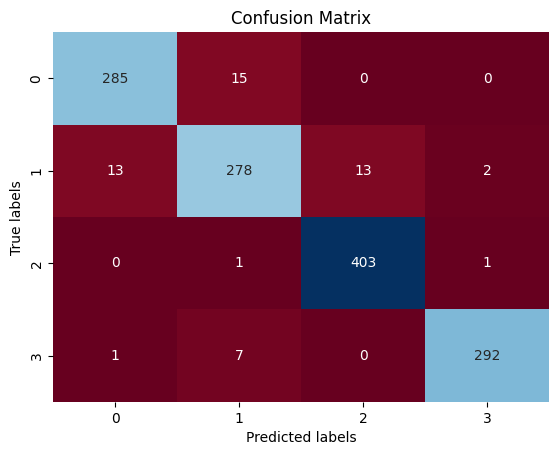

array([[285,  15,   0,   0],
       [ 13, 278,  13,   2],
       [  0,   1, 403,   1],
       [  1,   7,   0, 292]])

In [26]:
ax= plt.subplot()
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [27]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.95      0.95      0.95       300
           1       0.92      0.91      0.92       306
           2       0.97      1.00      0.98       405
           3       0.99      0.97      0.98       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311

